In [56]:
DATA_FOLDER = "/Users/pranavjha/Library/CloudStorage/GoogleDrive-pranajh7@gmail.com/My Drive/Projects/Swastik/swastik_web/data"

import os

os.environ["DATA_FOLDER"] = DATA_FOLDER
data_folder = os.environ.get("DATA_FOLDER")
if data_folder is None:
    print("The DATA_FOLDER environment variable is not set.")
else:
    print(f"The DATA_FOLDER environment variable is set to: {data_folder}")

The DATA_FOLDER environment variable is set to: /Users/pranavjha/Library/CloudStorage/GoogleDrive-pranajh7@gmail.com/My Drive/Projects/Swastik/swastik_web/data


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
## Read cgm data from ultrahuman app
df_uh = pd.read_excel(f"{data_folder}/nutrition/cgm/ultrahuman_cgm_readings.xlsx")
df_gl = pd.read_excel(f"{data_folder}/nutrition/cgm/glimp.xlsx").set_index('Timestamp')

In [59]:
# df_g = pd.read_csv(f"{data_folder}/nutrition/cgm/glimp.csv",encoding='utf-16le',delimiter=';',header=None).dropna(axis=1)
# df_g = df_g[[1,5,6]]
# df_g.columns = ['Timestamp', 'Glucose Reading/Event','Glucose Reading/Event-callib']
# df_g.to_excel(f"{data_folder}/nutrition/cgm/glimp.xlsx",index=None)

In [60]:
df =df_uh.drop_duplicates(['Timestamp'],keep='first')
df

,Timestamp,Glucose Reading/Event
0,"Mar 27 2023, 1:28 PM",156
1,"Mar 27 2023, 1:29 PM",155
2,"Mar 27 2023, 1:30 PM",154
3,"Mar 27 2023, 1:31 PM",153
5,"Mar 27 2023, 1:32 PM",171
...,...,...
14613,"May 6 2023, 11:03 PM",101
14614,"May 6 2023, 11:04 PM",101
14615,"May 6 2023, 11:05 PM",100
14616,"May 6 2023, 11:06 PM",100


In [61]:
df = df_uh
# convert values in 'my_column' to integers and drop rows that fail conversion
for index, row in df.iterrows():
    try:
        int(row['Glucose Reading/Event'])
    except ValueError:
        df = df.drop(index)

    
# display resulting dataframe
df

,Timestamp,Glucose Reading/Event
0,"Mar 27 2023, 1:28 PM",156
1,"Mar 27 2023, 1:29 PM",155
2,"Mar 27 2023, 1:30 PM",154
3,"Mar 27 2023, 1:31 PM",153
5,"Mar 27 2023, 1:32 PM",171
...,...,...
14613,"May 6 2023, 11:03 PM",101
14614,"May 6 2023, 11:04 PM",101
14615,"May 6 2023, 11:05 PM",100
14616,"May 6 2023, 11:06 PM",100


In [62]:
# convert 'Timestamp' column to datetime format and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

/var/folders/2c/bnxpy2zd5tg51llb27r91_dw0000gn/T/ipykernel_51731/2258319390.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



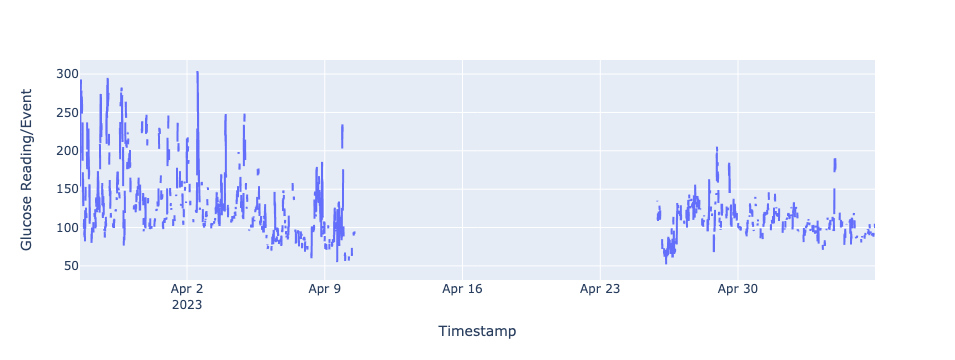

In [64]:
import pandas as pd
import plotly.express as px



# resample data at 1-minute frequency
df = df.resample('2T').mean()

# plot data using Plotly Express
fig = px.line(df, x=df.index, y='Glucose Reading/Event')
# fig = px.line(df_gl, x=df_gl.index, y='Glucose Reading/Event')
fig.show()